In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [2]:
adaptive_acc = [14.748000000000001,13.998999999999999,12.419999999999998,17.533,19.553,26.311,28.186,29.610000000000003,37.674,40.31699999999999,42.61399999999999,47.824,50.797000000000004,50.47499999999999,56.71600000000001,60.75400000000002,57.357000000000006,67.87700000000001,67.089,68.38,68.043,73.12100000000001,74.624,71.599,76.27000000000001,76.31899999999999,73.291,77.07999999999998,78.994,79.389,78.23700000000001,78.366,79.96700000000001,81.13600000000001,81.035,82.598,82.325,82.235,82.15099999999998,82.571,83.519,84.35199999999999,84.81800000000001,83.31700000000001,82.88499999999999,83.874,83.746,84.39099999999999,84.208,84.495,83.962,84.139,84.24,83.566,84.43900000000001,84.088,84.55600000000001,85.28500000000001,85.395,85.362,85.226]

In [3]:
adaptive_random_acc = [12.328999999999997,11.654999999999998,15.626999999999999,15.770999999999997,16.037,16.51,20.185,27.433,29.306,33.878,38.645,42.637,44.22500000000001,50.912000000000006,54.82400000000001,53.767999999999994,56.427,62.717999999999996,62.195000000000014,63.01299999999999,67.174,67.645,67.13699999999999,69.96400000000001,71.1,73.667,75.19800000000001,75.742,76.317,74.556,75.85000000000001,77.347,79.244,79.13699999999999,80.165,79.39000000000001,79.83099999999999,80.165,79.706,80.68199999999999,81.23000000000002,81.583,82.10799999999998,83.00999999999999,82.993,82.50899999999999,82.877,83.17800000000001,83.97,83.77600000000001,83.76599999999999,84.13199999999999,84.35,84.44300000000001,83.996,84.176,83.76400000000001,84.103,84.24199999999998,84.146,84.283]

In [4]:
len(adaptive_random_acc)

61

In [5]:
safa_data = pd.read_csv('res/safa_results/accuracy_results.csv')

In [6]:
safa_acc = np.array(safa_data['accuracy'])

In [7]:
safa_acc

array([17.039, 29.34 , 35.949, 41.891, 41.32 , 44.082, 54.005, 55.681,
       57.106, 57.083, 60.716, 65.024, 62.977, 66.632, 65.075, 68.658,
       66.567, 66.096, 66.268, 64.229, 70.85 , 72.188, 73.682, 72.446,
       70.692, 74.133, 74.166, 74.076, 76.097, 73.749, 74.859, 73.512,
       76.4  , 76.419, 74.181, 78.685, 76.035, 79.606, 77.713, 76.61 ,
       76.055, 79.927, 79.454, 76.843, 79.367, 77.763, 77.342, 76.267,
       76.971, 78.934, 83.066, 80.829, 78.103, 80.02 , 81.913, 79.624,
       77.126, 77.222, 77.312, 78.908, 81.011, 81.011])

In [8]:
sync_data = pd.read_csv('res/results_sync/accuracy_results.csv')
sync_acc = np.array(sync_data['accuracy'])
sync_acc

array([ 8.95, 10.09, 10.09, 10.17, 10.12, 26.37, 40.28, 47.38, 28.34,
       52.79, 59.78, 57.54, 67.51, 60.58, 55.98, 55.43, 69.85, 59.89,
       77.62, 64.99, 80.23, 69.38, 67.61, 69.54, 72.77, 73.34, 75.39,
       71.7 , 79.27, 72.81, 72.41, 68.9 , 67.52, 72.91, 75.5 , 75.91,
       72.95, 76.69, 76.13, 72.9 , 77.33, 76.25, 81.28, 81.25, 75.37,
       73.79, 70.64, 76.18, 70.99, 68.87, 68.28, 79.95, 82.64, 78.72,
       79.9 , 79.48, 75.42, 74.65, 73.68, 75.99, 76.84])

In [9]:
cotaf_data = pd.read_csv('res/cotaf_results/accuracy_results.csv')

In [10]:
cotaf_acc = np.array(cotaf_data['accuracy'])

In [13]:
window_size = 11
poly_order = 1

semiasync = savgol_filter(adaptive_acc, window_size, poly_order)
random = savgol_filter(adaptive_random_acc, window_size, poly_order)
sync = savgol_filter(sync_acc, window_size, poly_order)
safa = savgol_filter(safa_acc[:-1], window_size, poly_order)
cotaf = savgol_filter(cotaf_acc, window_size, poly_order)

In [15]:
print(len(semiasync), len(random), len(sync), len(safa), len(cotaf))

61 61 61 61 61


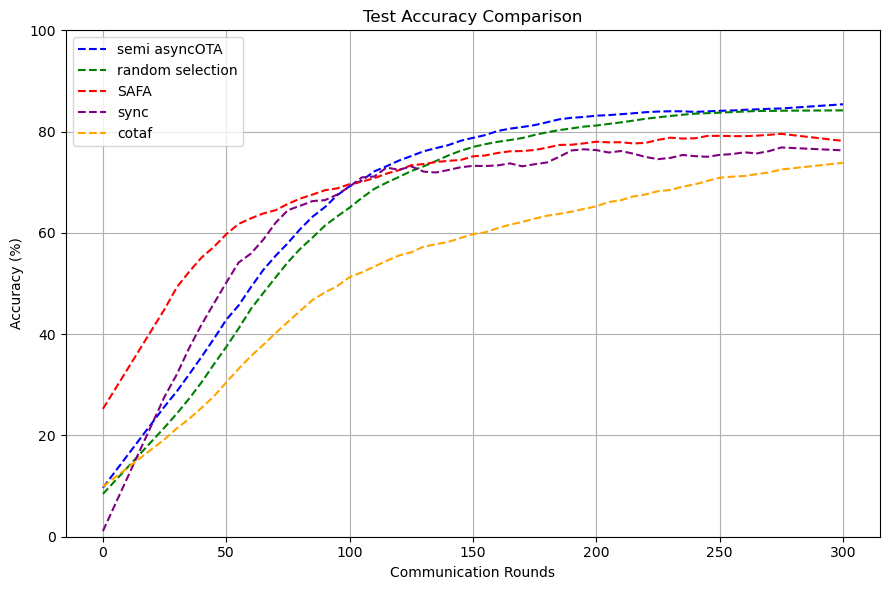

In [14]:
eval_rounds = [5 * i for i in range(len(semiasync))]
methods = [
    ('semi asyncOTA', semiasync),
    ('random selection', random),
    ('SAFA', safa),
    ('sync', sync),
    ('cotaf', cotaf),
]

colors = ['blue', 'green', 'red', 'purple', 'orange']

plt.figure(figsize=(9, 6))

for (label, data), color in zip(methods, colors):
    plt.plot(eval_rounds, data, linestyle='--', color=color, label=label)

plt.title("Test Accuracy Comparison")
plt.xlabel("Communication Rounds")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()